Нужные нам тексты:

Автор
Название
Год
Цицерон
Речи против Верреса 2.1-2
-70
Цезарь
Записки о галльской войне 1-7
-58/-50
Цицерон
Письма к Аттику
-68/?
Цицерон
Об обязанностях
-44
Цицерон
Филиппики 1-9
-44
Саллюстий
Заговор Катилины. Югуртинская война
~-40
Плиний
Письма 2-6
~100
Тацит
Анналы 1-3
~115
Светоний
Цезарь, Август, Тиберий
~119

In [41]:
# текст цезаря:
caesar_gall_addr = 'caesar/gall{}.txt' #от 1 до 7
# тексты Цицерона
cicero_att_addr = 'cicero/att{}.txt' #от 1 до 16
cicero_verr_addr = 'cicero/verres.2.{}.txt' # от 1 до 2
cicero_de_officiis_addr = 'cicero/off{}.txt' # от 1 до 3
cicero_phil_addr = 'cicero/phil{}.txt' #от 1 до 9
# тексты Саллюстия:
sall_catelene_addr = 'sall.1.txt'
# текст Плиния:
plinium_text_addr = 'pliny.ep{}.txt' #вставляем от 2 до 6 и складываем
#текст
# текст Тацита (вставляем от 1 до 3):
tacit_text_addr = 'tacitus/tac.ann{}.txt'
# текст Светония:
svet_text_addr = 'suetonius/suet.{}.txt' #caesar, aug, tib

In [38]:
text_prefix = 'https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/'
folder_prefix = 'https://github.com/'

In [7]:
import urllib.request

Функция для скачивания текста из нескольких частей:

In [42]:
def get_complex_text(addr,*ind):
    text = ''
    if str(type(ind[0])) == "<class 'int'>":
        iterable = range(ind[0],ind[1]+1)
    elif str(type(ind[0])) == "<class 'str'>":
        iterable = ind
    for i in iterable:
        new_addr = text_prefix+addr.format(i)
        print(new_addr)
        with urllib.request.urlopen(new_addr) as source:
            text += source.read().decode('utf-8')
    return text

Функция для скачивания текста из одной части:

In [43]:
def get_text(addr):
    new_addr = text_prefix+addr
    print(new_addr)
    with urllib.request.urlopen(new_addr) as source:
        text = source.read().decode('utf-8')
    return text

Скачаем с гитхаба все нужные нам тексты:

In [45]:
# текст цезаря:
caesar_gall = get_complex_text(caesar_gall_addr,1,7) #от 1 до 7
# тексты Цицерона
cicero_att = get_complex_text(cicero_att_addr,1,16) #от 1 до 16
cicero_verr = get_complex_text(cicero_verr_addr,1,2) # от 1 до 2
cicero_de_officiis = get_complex_text(cicero_de_officiis_addr,1,3) # от 1 до 3
cicero_phil = get_complex_text(cicero_phil_addr,1,9) #от 1 до 9
# тексты Саллюстия:
sall_catelene = get_text(sall_catelene_addr)
# текст Плиния:
plinium_text = get_complex_text(plinium_text_addr,2,6) #вставляем от 2 до 6 и складываем
#текст
# текст Тацита (вставляем от 1 до 3):
tacit_text = get_complex_text(tacit_text_addr,1,3)
# текст Светония:
svet_text = get_complex_text(svet_text_addr,'caesar','aug','tib') #caesar, aug, tib

https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall1.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall2.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall3.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall4.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall5.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall6.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/caesar/gall7.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/cicero/att1.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/cicero/att2.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/cicero/att3.txt
https://raw.githubusercontent.com/cltk/latin_text_latin_library/master/cicero/att4.txt
https://raw.githubusercontent.com/cl

Проверим, всё ли у нас правильно получилось и как будут токенизироваться тексты при помощи cltk

In [51]:
plinium_text[:400]

'Pliny the Younger\n\t\t \n\n\t\t \n\t\t \n\t \n\n \n\n C. PLINII CAECILII SECVNDI EPISTVLARVM LIBER SECVNDVS\n \n\n \n\n 1 \n \n\n \n 1 Post aliquot annos insigne atque etiam memorabile populi Romani oculis spectaculum exhibuit publicum funus Vergini Rufi, maximi et clarissimi civis, perinde felicis. 2 Triginta annis gloriae suae supervixit; legit scripta de se carmina, legit historias et posteritati suae interfuit. Perfu'

In [48]:
import cltk.tokenize.word
tokenizer = cltk.tokenize.word.WordTokenizer('latin')

In [53]:
str(tokenizer.tokenize(plinium_text[:400]))

"['Pliny', 'the', 'Younger', 'C.', 'PLINII', 'CAECILII', 'SECVNDI', 'EPISTVLARVM', 'LIBER', 'SECVNDVS', '1', '1', 'Post', 'aliquot', 'annos', 'insigne', 'atque', 'etiam', 'memorabile', 'populi', 'Romani', 'oculis', 'spectaculum', 'exhibuit', 'publicum', 'funus', 'Vergini', 'Rufi', ',', 'maximi', 'et', 'clarissimi', 'civis', ',', 'perinde', 'felicis', '.', '2', 'Triginta', 'annis', 'gloriae', 'suae', 'supervixit', ';', 'legit', 'scripta', 'de', 'se', 'carmina', ',', 'legit', 'historias', 'et', 'posteritati', 'suae', 'interfuit', '.', 'Perfu']"

In [54]:
from cltk.stem.lemma import LemmaReplacer
lemmatizer = LemmaReplacer('latin')

In [57]:
str(lemmatizer.lemmatize(plinium_text[:400]))

"['Pliny', 'thos', 'Younger', 'C.', 'PLINII', 'CAECILII', 'SECVNDI', 'EPISTVLARVM', 'libo1', 'SECVNDVS', '1', '1', 'post', 'aliquot', 'annus', 'insigne', 'atque', 'etiam', 'memorabile', 'populus1', 'Romani', 'oculus', 'spectaculum', 'exhibeo', 'publicum', 'funus', 'Vergini', 'rufus1', ',', 'magnus', 'et', 'clarus', 'civis', ',', 'perinde', 'felix1.', '2', 'triginta', 'annus', 'gloria', 'sua', 'supervivo', ';', 'lego2', 'scribo', 'de', 'sui', 'carmen1', ',', 'lego2', 'historia', 'et', 'posteritas', 'sua', 'intersum.', 'Perfu']"

Как видим, tokenizer и lemmatizer из CLTK учитывают как отдельные слова также знаки препинания, поэтому напишем также функцию, которая очищает полученный список от знаков препинания:

In [58]:
clear_punct = lambda x: [i for i in x if i not in (';','!','?','-',
                                                  '.',',','"',"'")]

Напишем функцию, которая преврашает поступивший на вход текст в двумерный ряд данных вида <b>порядковый номер (n)слова в тексте --- количество различных лексем среди первых n словоупотреблений текста</b>

In [59]:
import numpy as np

In [100]:
def process_text(text):
    x, y = [],[]
    used_lemmas = []
    lemma_count = 0
    lemmatized_text = clear_punct(lemmatizer.lemmatize(text))
    for i in range(len(lemmatized_text)):
        if lemmatized_text[i] not in used_lemmas:
            used_lemmas.append(lemmatized_text[i])
            lemma_count += 1
        x.append(i+1)
        y.append(lemma_count)
    return x, y

Начнём с "Записок о галльской войне" Цезаря:

In [61]:
import matplotlib.pyplot as plt

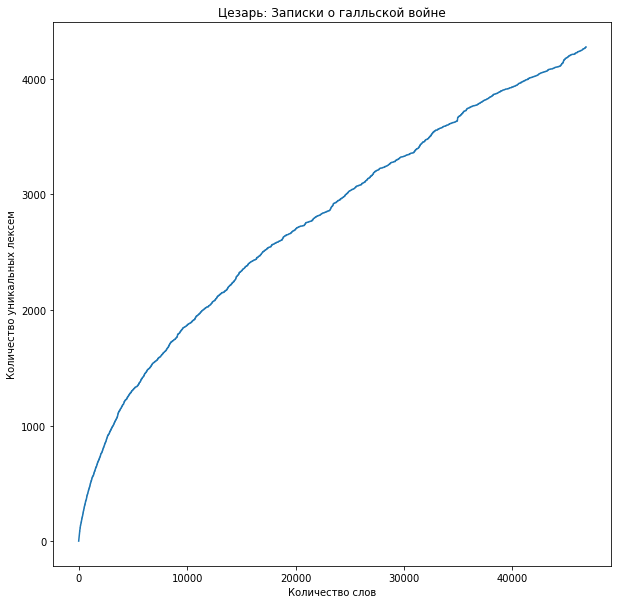

In [101]:
x, y = process_text(caesar_gall)
plt.figure(figsize=[10,10])
plt.title('Цезарь: Записки о галльской войне')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('caesar_gall_F.png')

Также посмотрим прирост количества уникальных лексем по методу скользящего среднего с окном в 100 словоупотреблений:

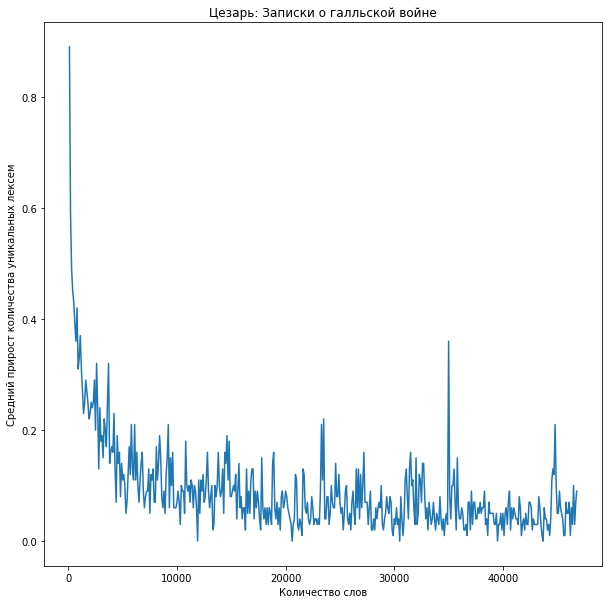

In [134]:
window = 100
x, y = process_text(caesar_gall)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Цезарь: Записки о галльской войне')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('caesar_gall_f.png')

Цицерон - Письма к Аттику:

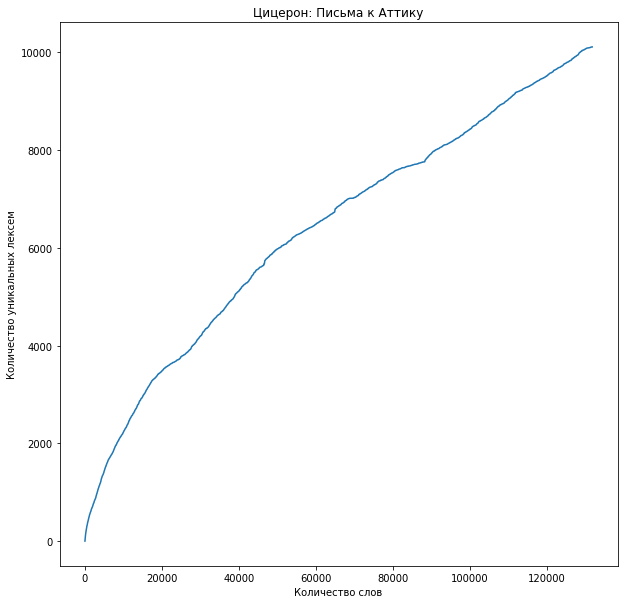

In [106]:
x, y = process_text(cicero_att)
plt.figure(figsize=[10,10])
plt.title('Цицерон: Письма к Аттику')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('cicero_att_F.png')

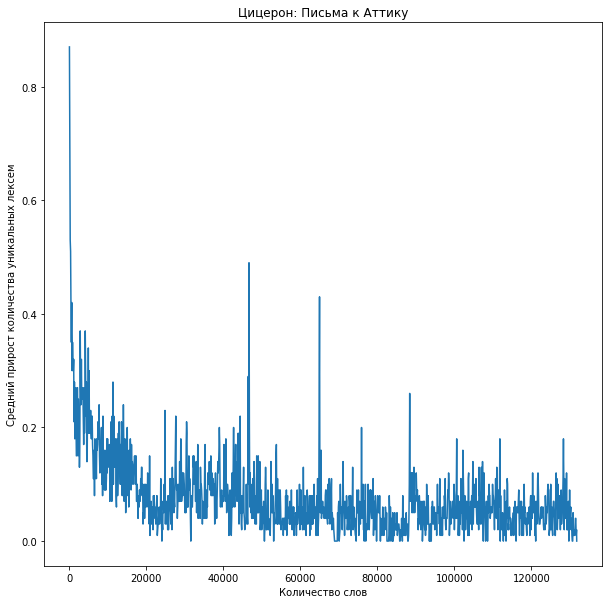

In [133]:
window = 100
x, y = process_text(cicero_att)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Цицерон: Письма к Аттику')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('cicero_att_f.png')

Цицерон - Речи против Верреса:

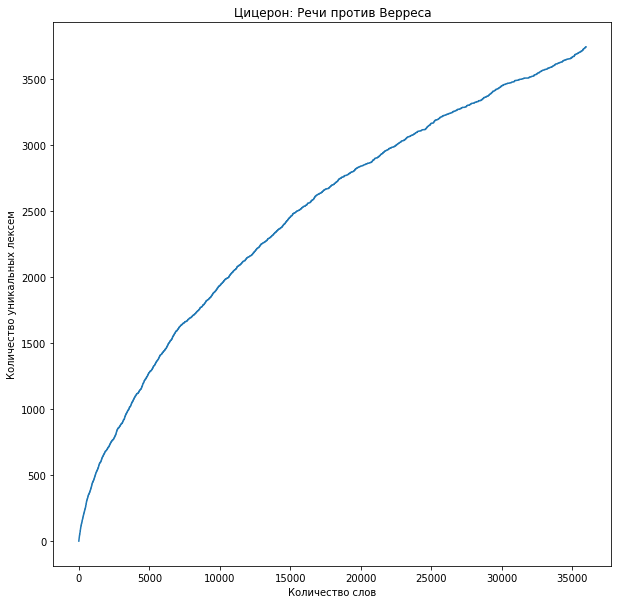

In [108]:
x, y = process_text(cicero_verr)
plt.figure(figsize=[10,10])
plt.title('Цицерон: Речи против Верреса')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('cicero_verr_F.png')

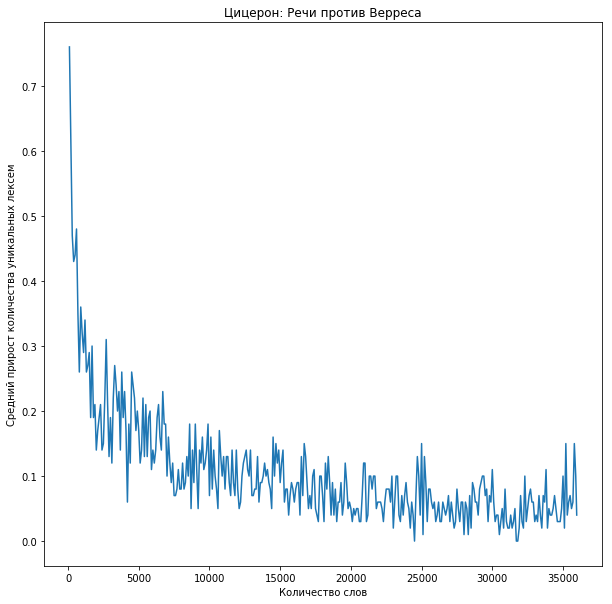

In [132]:
window = 100
x, y = process_text(cicero_verr)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Цицерон: Речи против Верреса')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('cicero_verr_f.png')

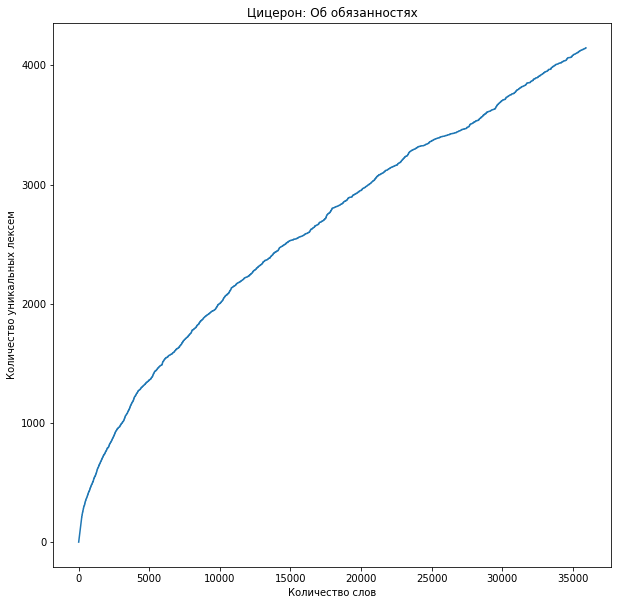

In [110]:
x, y = process_text(cicero_de_officiis)
plt.figure(figsize=[10,10])
plt.title('Цицерон: Об обязанностях')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('cicero_de_officiis_F.png')

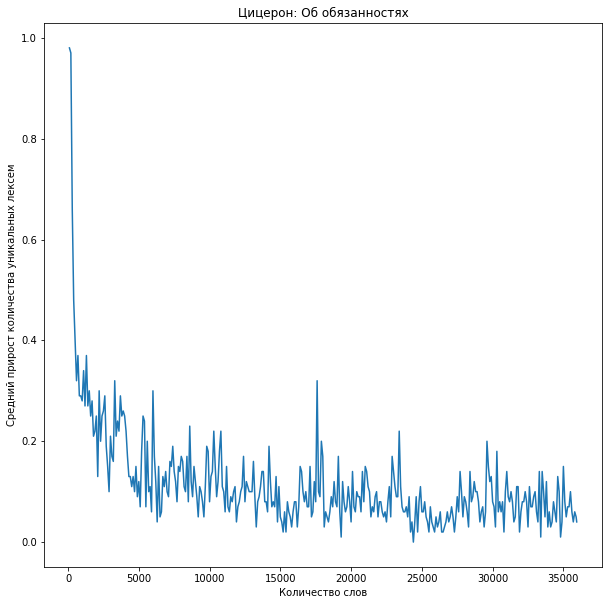

In [131]:
window = 100
x, y = process_text(cicero_de_officiis)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Цицерон: Об обязанностях')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('cicero_de_oficiis_f.png')

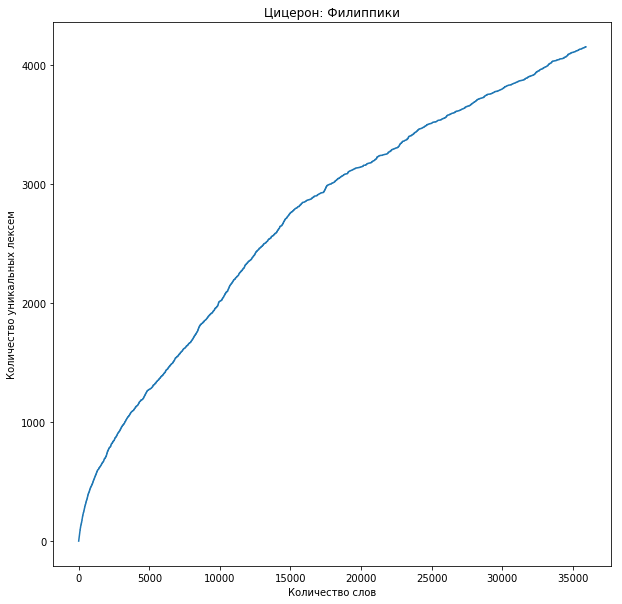

In [112]:
x, y = process_text(cicero_phil)
plt.figure(figsize=[10,10])
plt.title('Цицерон: Филиппики')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('cicero_phil_F.png')

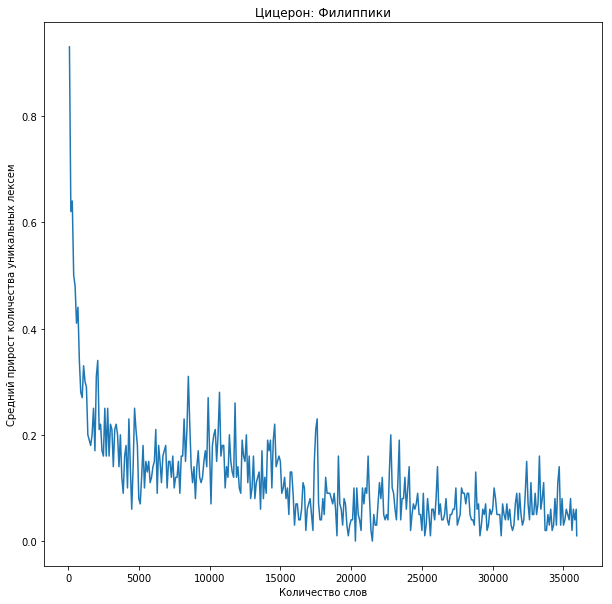

In [130]:
window = 100
x, y = process_text(cicero_phil)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Цицерон: Филиппики')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('cicero_phil_f.png')

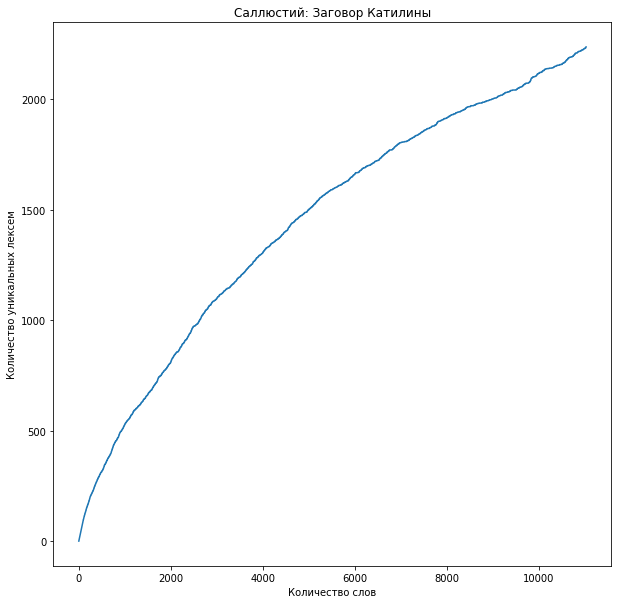

In [114]:
x, y = process_text(sall_catelene)
plt.figure(figsize=[10,10])
plt.title('Саллюстий: Заговор Катилины')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('sall_catelene_F.png')

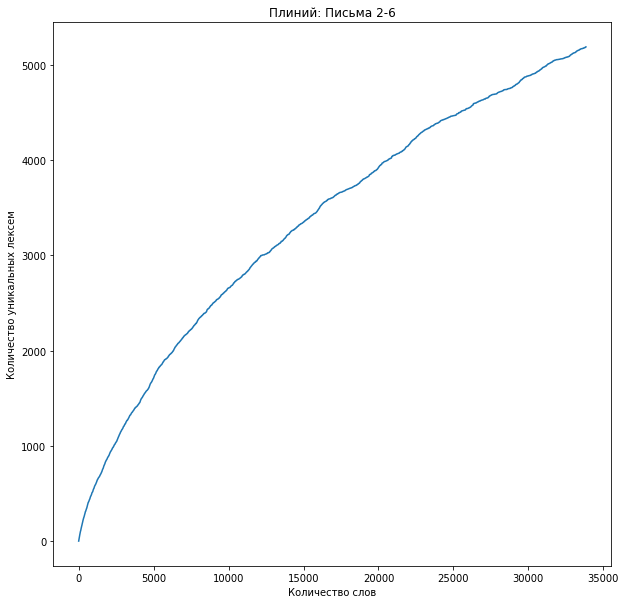

In [115]:
x, y = process_text(plinium_text)
plt.figure(figsize=[10,10])
plt.title('Плиний: Письма 2-6')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('plinium_text_F.png')

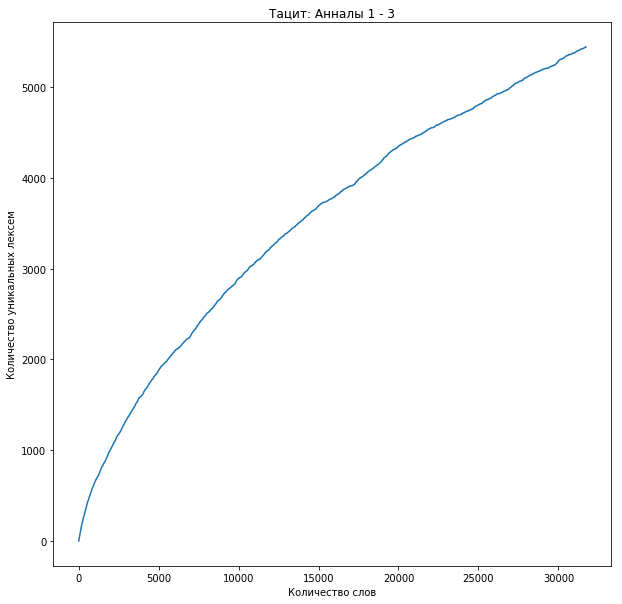

In [116]:
x, y = process_text(tacit_text)
plt.figure(figsize=[10,10])
plt.title('Тацит: Анналы 1 - 3')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('tacit_text_F.png')

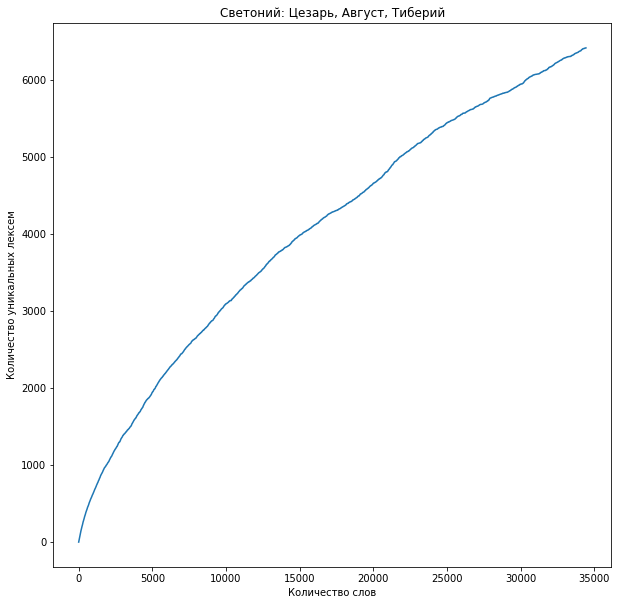

In [118]:
x, y = process_text(svet_text)
plt.figure(figsize=[10,10])
plt.title('Светоний: Цезарь, Август, Тиберий')
plt.xlabel('Количество слов')
plt.ylabel('Количество уникальных лексем')
plt.plot(x,y)
plt.savefig('svet_text_F.png')

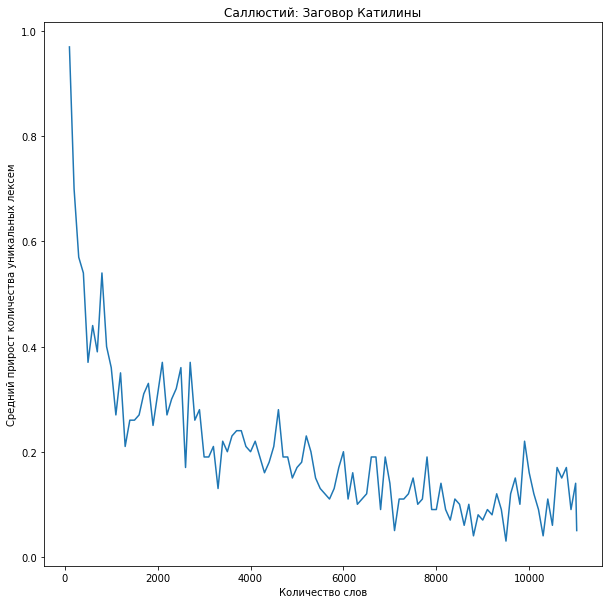

In [135]:
window = 100
x, y = process_text(sall_catelene)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Саллюстий: Заговор Катилины')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('sall_catelene_f.png')

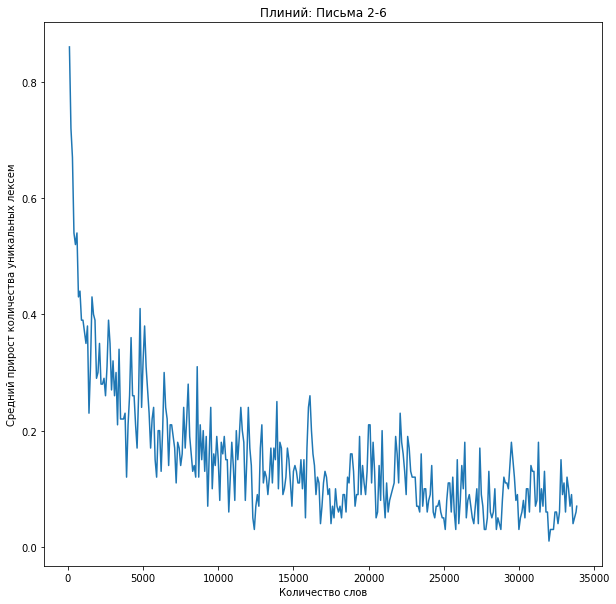

In [136]:
window = 100
x, y = process_text(plinium_text)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Плиний: Письма 2-6')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('plinium_text_f.png')

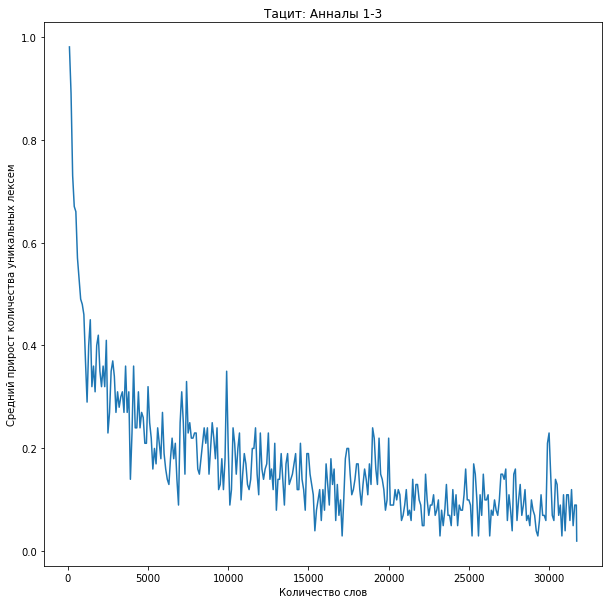

In [137]:
window = 100
x, y = process_text(tacit_text)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Тацит: Анналы 1-3')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('tacit_text_f.png')

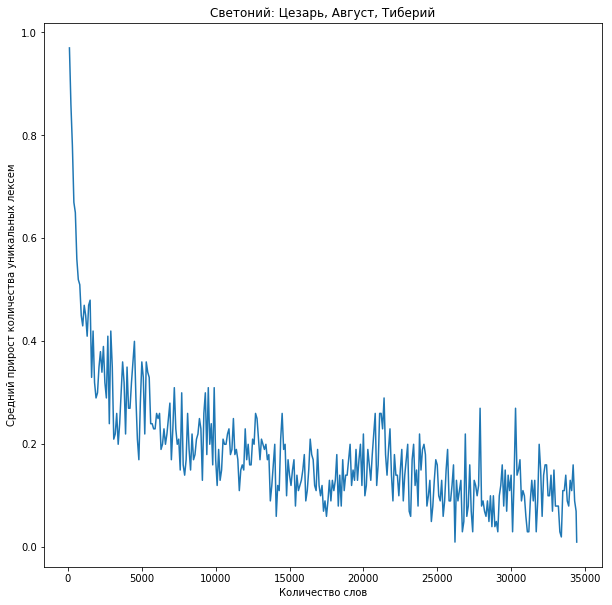

In [138]:
window = 100
x, y = process_text(svet_text)
x = [i for i in x if i%window == 0 or i == len(y)]
diff = [i for i in np.diff(y)]
cum_diff = []
start = 0
for i in x:
    cum_diff.append(sum(diff[start:i])/100)
    start = i
plt.figure(figsize=[10,10])
plt.title('Светоний: Цезарь, Август, Тиберий')
plt.xlabel('Количество слов')
plt.ylabel('Средний прирост количества уникальных лексем')
plt.plot(x,cum_diff)
plt.savefig('svet_text_f.png')